In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import glob
import itertools
import collections
import shutil
import os
from PIL import Image

%matplotlib inline

In [2]:
train_files = list(glob.iglob('../../data/plant-seed/download/**/*.png', recursive=True))
test_files = list(glob.iglob('../../data/plant-seed/test/**/*.png', recursive=True))

### data explore

In [3]:
print('lenght of trainset:', len(train_files))
print('length of testset:', len(test_files))

lenght of trainset: 4750
length of testset: 794


In [4]:
classes = collections.Counter([x.split('/')[-2] for x in train_files])

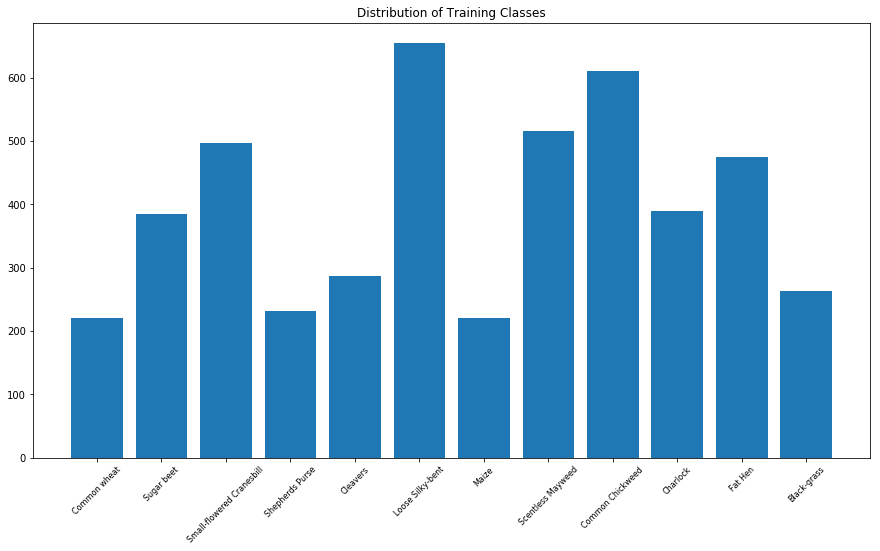

In [5]:
plt.figure(figsize=(15,8))
plt.bar(range(len(classes)), classes.values())
plt.xticks(range(len(classes)), classes.keys(), fontsize=8, rotation=45)
plt.title('Distribution of Training Classes')
plt.show()

### create validation sample

In [ ]:
np.random.seed(123)
valid_files = np.random.choice(train_files, size=750, replace=False)
train_files = [x for x in train_files if x not in valid_files]
print('lenght of trainset:', len(train_files))
print('length of validset:', len(valid_files))

lenght of trainset: 4000
length of validset: 750


In [ ]:
for file in train_files:
    try:
        shutil.copy(file,file.replace('download','train'))
    except IOError:
        directory = file.replace('download','train')[:-14]
        os.makedirs(directory)
        shutil.copy(file,file.replace('download','train'))
        
print(len(list(glob.iglob('../../data/plant-seed/train/**/*.png', recursive=True))))

In [ ]:
for file in valid_files:
    try:
        shutil.copy(file,file.replace('download','valid'))
    except IOError:
        directory = file.replace('download','valid')[:-14]
        os.makedirs(directory)
        shutil.copy(file,file.replace('download','train'))

print(len(list(glob.iglob('../../data/plant-seed/valid/**/*.png', recursive=True))))

### class images

In [ ]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/valid/Black-grass/0183fdf68.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/valid/Black-grass/0260cffa8.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/valid/Black-grass/075d004bc.png'))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/valid/Charlock/084a9cb18.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/valid/Charlock/09f038ce4.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/valid/Charlock/137c4e78e.png'))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/valid/Cleavers/01605ed73.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/valid/Cleavers/06f447848.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/valid/Cleavers/06f447848.png'))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/valid/Maize/0184ec53f.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/valid/Maize/16e38d4af.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/valid/Maize/19f880311.png'))
plt.show()